[*********************100%%**********************]  11 of 11 completed

1 Failed download:
['HDFC.NS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2014-01-01 -> 2023-12-31)')


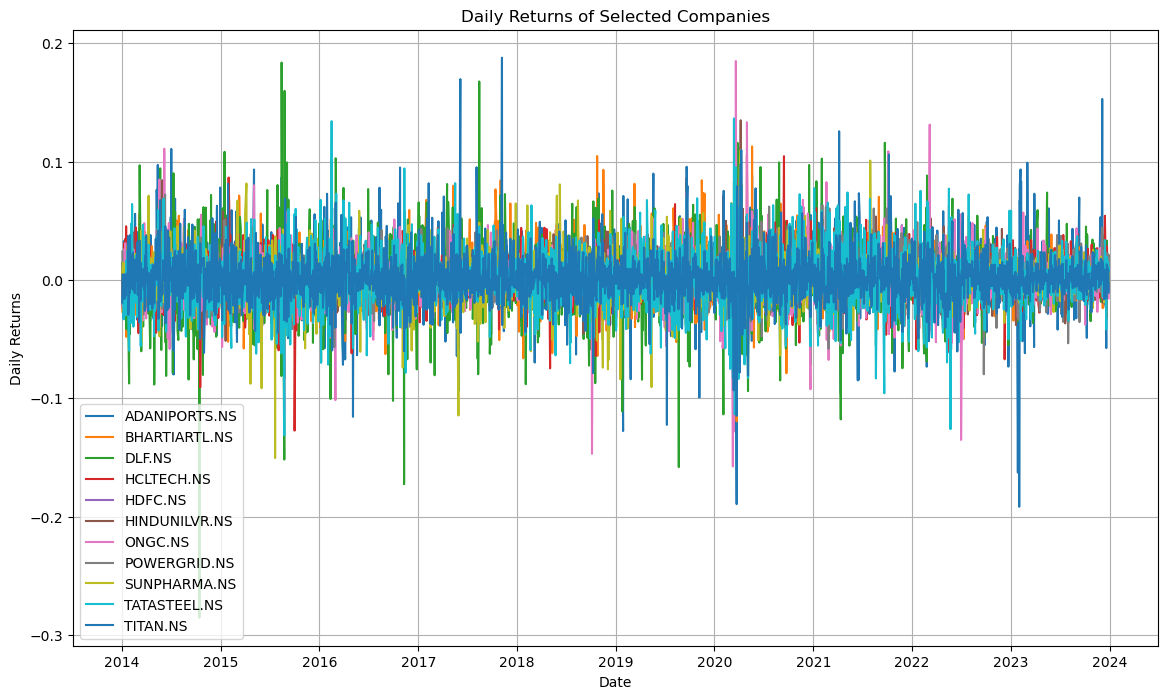

In [511]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the tickers of the selected companies
tickers = ['ONGC.NS', 'TATASTEEL.NS', 'ADANIPORTS.NS', 'TITAN.NS', 'HINDUNILVR.NS',
           'SUNPHARMA.NS', 'HDFC.NS', 'HCLTECH.NS', 'BHARTIARTL.NS', 'POWERGRID.NS', 'DLF.NS']

# Define the date range
start_date = '2014-01-01'
end_date = '2023-12-31'

# Fetch historical market data for the selected companies
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
returns = data.pct_change()

# Plot the returns of the selected companies
plt.figure(figsize=(14, 8))
for ticker in returns.columns:
    plt.plot(returns.index, returns[ticker], label=ticker)

plt.title('Daily Returns of Selected Companies')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


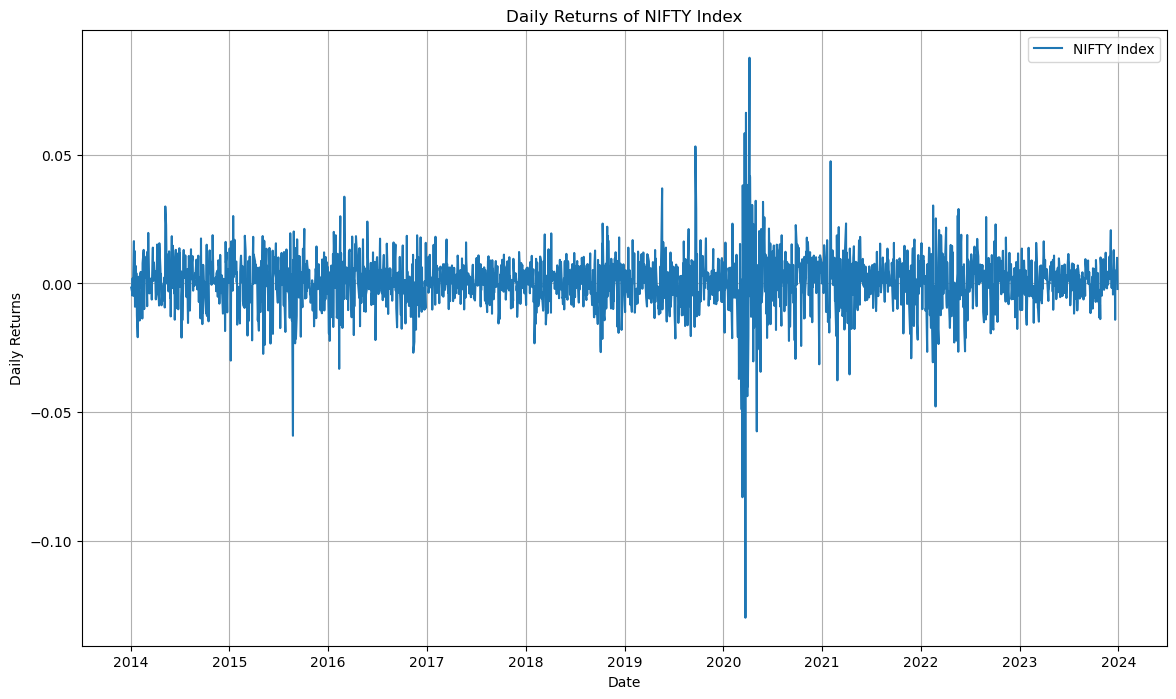

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the ticker for NIFTY index
nifty_ticker = '^NSEI'

# Define the date range
start_date = '2014-01-01'
end_date = '2023-12-31'

# Fetch historical market data for NIFTY index
nifty_data = yf.download(nifty_ticker, start=start_date, end=end_date)['Adj Close']

# Calculate daily returns
nifty_returns = nifty_data.pct_change()

# Plot the returns of the NIFTY index
plt.figure(figsize=(14, 8))
plt.plot(nifty_returns.index, nifty_returns, label='NIFTY Index')

plt.title('Daily Returns of NIFTY Index')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
!pip install pyPortfolioOpt
!pip install yfinance

In [5]:
pip install pandas_datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 2.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime
import yfinance as yf
yf.pdr_override()

%matplotlib inline

[*********************100%%**********************]  11 of 11 completed


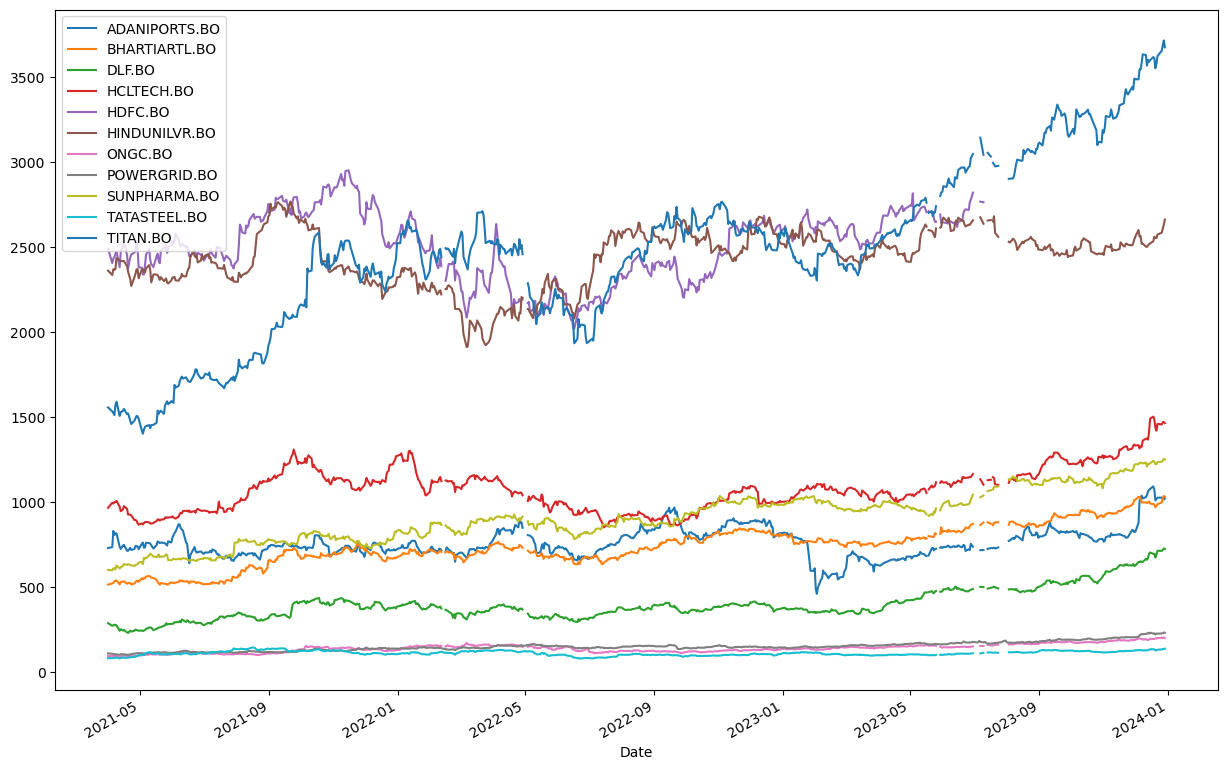

In [7]:
import datetime
import pandas as pd
import pandas_datareader.data as web

start_date = datetime.datetime(2014, 1, 1)
end_date = datetime.datetime(2023, 12, 31)

def get_stock_price(tickers):
    prices = web.get_data_yahoo(tickers, start_date, end_date)
    prices = prices["Adj Close"].dropna(how="all") 
    return prices

bse_tickers = ['ONGC.BO', 'TATASTEEL.BO', 'ADANIPORTS.BO', 'TITAN.BO', 'HINDUNILVR.BO',
               'SUNPHARMA.BO', 'HDFC.BO', 'HCLTECH.BO', 'BHARTIARTL.BO', 'POWERGRID.BO', 'DLF.BO']

portfolio = get_stock_price(bse_tickers)
portfolio.to_csv("portfolio.csv", index=True)
portfolio = pd.read_csv("portfolio.csv", parse_dates=True, index_col="Date")
portfolio[portfolio.index >= "2021-04-01"].plot(figsize=(15,10));

{'ADANIPORTS.BO': 0.09154, 'BHARTIARTL.BO': 0.09089, 'DLF.BO': 0.09191, 'HCLTECH.BO': 0.09048, 'HDFC.BO': 0.09101, 'HINDUNILVR.BO': 0.08966, 'ONGC.BO': 0.09125, 'POWERGRID.BO': 0.08993, 'SUNPHARMA.BO': 0.09066, 'TATASTEEL.BO': 0.09161, 'TITAN.BO': 0.09104}
Expected annual return: 21.6%
Annual volatility: 18.1%
Sharpe Ratio: 1.09
Discrete allocation: {'DLF.BO': 12, 'TATASTEEL.BO': 65, 'ADANIPORTS.BO': 8, 'ONGC.BO': 45, 'TITAN.BO': 3, 'HDFC.BO': 3, 'BHARTIARTL.BO': 8, 'SUNPHARMA.BO': 7, 'HCLTECH.BO': 6, 'POWERGRID.BO': 39, 'HINDUNILVR.BO': 4}
Funds remaining: ₹20.98
Sample portfolio returns: [0.20202889 0.20326456 0.19872255 ... 0.2063541  0.20696114 0.19425717]
Sample portfolio volatilities: 0       0.177089
1       0.191624
2       0.179362
3       0.195258
4       0.204468
          ...   
9995    0.199982
9996    0.172862
9997    0.184902
9998    0.180715
9999    0.171969
Length: 10000, dtype: float64


/Users/rndpk/anaconda3/lib/python3.11/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
/var/folders/wv/wwt8vfh16138drlg8nw9gklc0000gn/T/ipykernel_2375/121040388.py:65: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


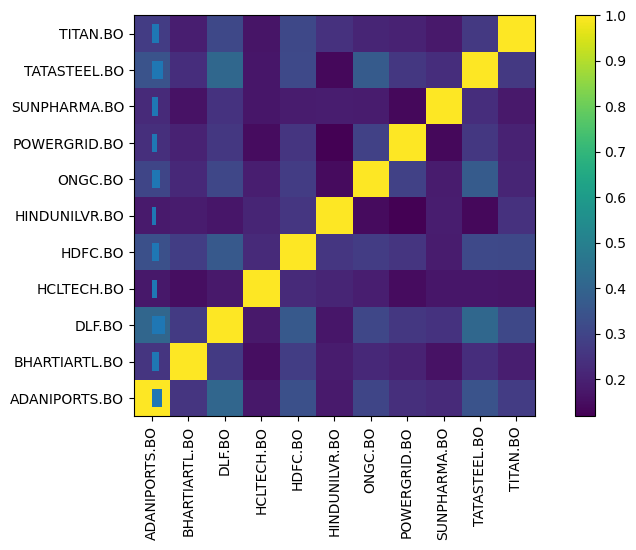

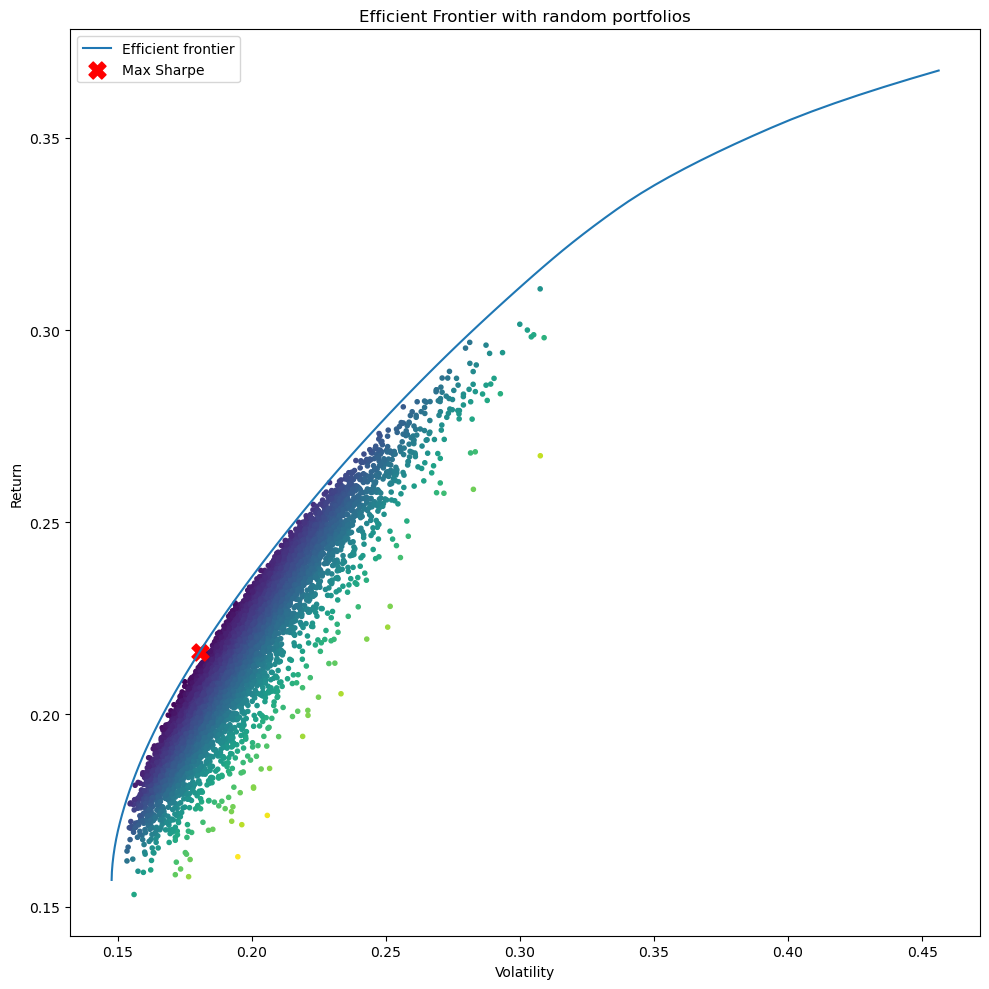

In [48]:
import pypfopt
from pypfopt import risk_models
from pypfopt import plotting
import matplotlib.pyplot as plt

# Set Matplotlib style to default
plt.style.use("default")

# Calculate sample covariance matrix
sample_cov = risk_models.sample_cov(portfolio, frequency=252)
S = risk_models.CovarianceShrinkage(portfolio).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True);
from pypfopt import expected_returns

mu = expected_returns.capm_return(portfolio)

mu.plot.barh(figsize=(10,6));
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(dict(cleaned_weights))

ef.portfolio_performance(verbose=True)

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(portfolio)

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=100000)

# Number of shares of each stock to purchase
allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: \u20B9{:.2f}".format(leftover))
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds

print("Sample portfolio returns:", rets)
print("Sample portfolio volatilities:", stds)

# Plot efficient frontier with Monte Carlo sim
ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots(figsize= (10,10))
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find and plot the tangency portfolio
ef2 = EfficientFrontier(mu, S)
ef2.max_sharpe()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()

# Plot random portfolios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")
ax.scatter(std_tangent, ret_tangent, c='red', marker='X',s=150, label= 'Max Sharpe')

# Format
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.show()
